# <u>Groupby

The groupby method allows us to group rows of data together and call aggregate functions.

---

# <u>Groupby in SQL:

    Groupby allows us to aggregate columns per some category.
    
    Most common Aggregate functions in SQL:
                                            AVG()
                                            COUNT()
                                            MAX()
                                            MIN()
                                            SUM()

    An Aggregate function takes multiple inputs and returns a single output.

---

# <u>Groupby in Pandas.

Aggregate function being done in this example is sum.

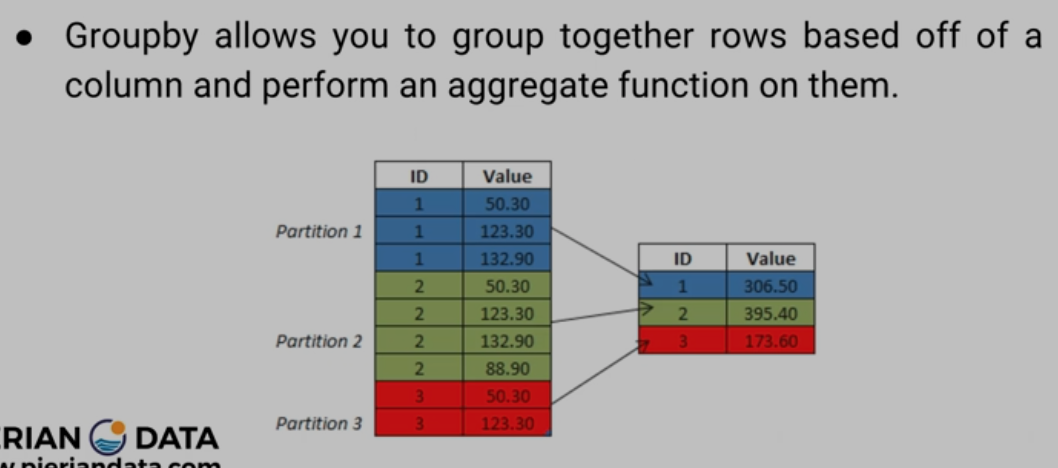

### <u>Syntax:

    df.groupby('col_name').method_name(numeric_only = True)

In [8]:
import numpy as np
import pandas as pd

In [9]:
# Create a DataFrame using a dictionary.

data = {'Company': ['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person': ['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales': [200,120,340,124,243,350]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


### <u>STEP 1:

    Now we can use the .groupby() method to group rows together based off of a column name. For instance let's group based off of Company. This will create a DataFrameGroupBy object:

In [13]:
df.groupby('Company')

- <u>NOTE:

    - I will get a DataFrameGroupBy object and it just points to where it's stored in memory.

### <u>STEP 2:

    We can save this object as a new variable:

In [16]:
# by_company

by_comp = df.groupby('Company')
by_comp

### <u>STEP 3:

    And then we can call aggregate methods off the object:

In [18]:
# TypeError: agg function failed [how->mean,dtype->object]

# by_comp.mean()

- <u>NOTE:

    - In older versions of Pandas (< 1.5), non-numeric columns were automatically ignored when using .mean(), so we didn't get an error.
    - In newer versions:
        - by_comp.mean()
        - → Pandas internally checks each column in the group:
        - Company → string → ❌ can’t mean
        - Person → string → ❌ can’t mean
        - Sales → numeric → ✅ can mean
        - Since the non-numeric columns cause issues in the newer Pandas versions, it errors out.

**To make it work for just Sales:**

Specify numeric_only argument inside the method to be True. 

numeric_only : bool, default False

    Include only float, int, boolean columns.

In [21]:
by_comp.mean(numeric_only = True)

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [22]:
# OR Grabbing the column and then calling the method on it.

by_comp['Sales'].mean()

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64

**Doing it in a single step:**

In [24]:
df.groupby('Company').mean(numeric_only = True)

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [25]:
df.groupby('Company')['Sales'].mean()

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64

---

# <u>More examples of aggregate methods:

1) sum()
2) std()
3) count()
4) max()
5) min()
6) mean()

In [29]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [30]:
# sum

by_comp.sum(numeric_only = True)

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [31]:
# OR

by_comp['Sales'].sum()

Company
FB      593
GOOG    320
MSFT    464
Name: Sales, dtype: int64

- <u>NOTE:

    - Notice that we get a DataFrame in return after calling by_comp.sum(numeric_only = True).
    - And a series after calling by_comp['Sales'].sum().
    - That means we can index from this.

### Example: Get the sum of sales of Facebook.

In [34]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [35]:
by_comp.sum(numeric_only = True).loc['FB']

Sales    593
Name: FB, dtype: int64

In [36]:
# OR

by_comp['Sales'].sum()['FB']

593

In [37]:
# Doing it in a single step.

df.groupby('Company').sum(numeric_only = True).loc['FB']

Sales    593
Name: FB, dtype: int64

In [38]:
# Standard Deviation.

df.groupby('Company').std(numeric_only = True)

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [39]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [40]:
# count

df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


- <u>NOTE:

    - We do not need to specify numeric_only = True since count() just counts the number of instances for a column.

In [42]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [43]:
# max

by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


- <u>NOTE:

    - We are doing GroupBy the company so for example 'GOOG' max is for 'Sam' = 200.
    - And note here that it also returns the person because Python is able to store things in alphabetical order.

- <u>NOTE:

    - However we probably shouldn't be using min() or max() with a string column. 
    - We'll probably use all these AGG functions really with numeric columns.

In [46]:
by_comp['Sales'].max()

Company
FB      350
GOOG    200
MSFT    340
Name: Sales, dtype: int64

In [47]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [48]:
by_comp['Sales'].min()

Company
FB      243
GOOG    120
MSFT    124
Name: Sales, dtype: int64

---

# <u>describe():

    Describe method gives us a bunch of useful information all at once.

In [51]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [52]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

If we don't like the format being presented we could use the transpose method:

In [54]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [55]:
# We can index fro this too !!!

by_comp.describe().transpose()['GOOG']

Sales  count      2.000000
       mean     160.000000
       std       56.568542
       min      120.000000
       25%      140.000000
       50%      160.000000
       75%      180.000000
       max      200.000000
Name: GOOG, dtype: float64

---